**CS596 - Machine Learning**
<br>
Date: **21 September 2020**


Title: **Seminar 3: Linear Regression (Part 2)**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<h2 align="center">Linear Models for Classification</h2>

<h3 align="center">Fisher’s Linear Discriminant</h3>

- **Fisher's Linear Discriminant Analysis** (**LDA**) **searches** for the **projection** of a dataset which **maximizes** the **between class scatter** to **within class scatter** ($\frac{S_B}{S_W}$) ratio of this projected dataset.

  <img src="images/S3_SB_SW.png" width="500" alt="Example" />


- The **within class scatter** $S_W$:

  $$S_W = \sum_{i=1}^{K} \sum_{j\in C_i} \left ( x_j - \mu_i \right ) \left ( x_j - \mu_i \right )^T,$$
  
  where $K$ is the number of classes and $\mu_i$ is the mean vector of class $C_i$.
  
  
- The **between class scatter** $S_B$:

  $$S_B =  \sum_{i=1}^{K} N_i \left ( \mu_j - \mu \right )\left ( \mu_j - \mu \right )^T,$$
  
  where $mu$ is the mean vector of the total dataset and $N_i$ is the number of element in class $C_i$.
  
  
- The derivation of the $S_B$ is not that obvious. Let's derive it!


- Assume we create a **total scatter matrix** with:

  $$S_T = \sum_{\mathbf{x}} \left ( \mathbf{x} - \mu \right )\left ( \mathbf{x} - \mu \right )^T$$
  
  where $\mu$ is the mean of total dataset.
  
  We can write:
  
  $$\mathbf{x} - \mu = \mathbf{x} - \mu_i  + \mu_i - \mu.$$

  Thus:
  
  $$S_T = \sum_{\mathbf{x}} \left ( \mathbf{x} - \mu \right )\left ( \mathbf{x} - \mu \right )^T = 
   \sum_{i=1}^{K} \sum_{\mathbf{x} \in C_i} (\mathbf{x} - \mu_i + \mu_i - \mu)(\mathbf{x} - \mu_i + \mu_i - \mu)^T = \\
   =\sum_{i=1}^{K} \sum_{\mathbf{x} \in C_i} (\mathbf{x} - \mu_i)(\mathbf{x} - \mu_i)^T + 
   \sum_{i=1}^{K} \sum_{\mathbf{x} \in C_i} (\mu_i - \mu)(\mu_i - \mu)^T = \\
   =\sum_{i=1}^{K} \sum_{\mathbf{x} \in C_i} (\mathbf{x} - \mu_i)(\mathbf{x} - \mu_i)^T + \sum_{i=1}^{K} N_i (\mu_i - \mu)(\mu_i - \mu)^T = \\
   = S_W + S_B.$$
  

- Now we want to **maximize** $\frac{S_B}{S_W}$ to get a as good as possible separation.


- Further we know that we want to achieve that by **transforming** our **data** to a **lower dimensionality**.


- We can transform data using a transformation matrix $\mathbf{w}$, so

  $$y = \mathbf{w}^T \mathbf{x}.$$
  
  
- So, applying this transformation to our $\mathbf{x}$, $\mu_i$ and $\mu$ in our $S_W$ and $S_B$ equations gives:

  $$S_W = \sum_{i=1}^{K} \sum_{x\in C_i} \left ( \mathbf{w}^T (x - \mu_i) \right )\left ( \mathbf{w}^T (x - \mu_i) \right )^T = \mathbf{w}^T S_W \mathbf{w}$$
  
  and
  
  $$S_B = \sum_{i=1}^{K} N_i \left ( \mathbf{w}^T (\mu_i - \mu) \right )\left ( \mathbf{w}^T (\mu_i - \mu) \right )^T = \mathbf{w}^T S_B \mathbf{w},$$
  
  hence the equation $\frac{S_B}{S_W}$ becomes:
  
  $$J(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}$$

- So what remains now is **how we can find** the $\mathbf{w}$ that **maximizes this equation**?!


- It turns out that $\mathbf{w}$ can be found by calculating the **eigenvectors** of $S_W^{-1} S_B$.


- You can find the expression in the **Dimensionality.pdf** file.


- So, inserting these **eigenvalues** ($\lambda$) into $S_W^{-1} S_B - \lambda \mathbf{I}=0$ gives us a **linear set of equations**.


- Solving these equations for $\mathbf{w}$ gives us the corresponding **eigenvectors**.


- Good thing is that **NumPy** offers us a neat way to find the corresponding eigenvectors with just **one line of code**!

<h3 align="center">Processing Steps</h3>


So we have now understand the concept behind **Fisher's LDA**, and its time to make an example in Python following the next steps:

1. Compute the **total mean vector** $\mu$ as well as the mean vectors per class $μ_i$


2. Compute the **scatter withing** and **scatter between** matrices $S_B$ and $S_W$


3. Compute the **eigenvalues** and **eigenvectors** of $S_W^{-1}S_B$ to find the $\mathbf{w}$ which **maximizes** $\frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}.$

4. Select the **eigenvectors** of the **corresponding** $k$ **largest eigenvalues** to create a $D \times K$ dimensional transformation matrix $W$ where the **eigenvectors** are the **columns of this matrix**.


5. Use $\mathbf{W}$ to transform the **original** $N \times D$ **dimensional dataset** $\mathbf{x}$ into a **lower**, $N \times K$ dimensional dataset $\mathbf{Y}$.


- To demonstrate the Fisher Liner Discriminant we use the <a href = "https://archive.ics.uci.edu/ml/datasets/wine">UCI wine dataset</a>.


- We have already downloaded it to the **data** folder so that we can access it.

 
- But first, let's take a look at the **description** of this dataset.

In [2]:
f = open("data./wine_description.txt")
print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [4]:
# 0. Load the dataset
df = pd.read_csv('data/wine.txt',sep=',',names=['target','Alcohol','Malic_acid','Ash','Akcakinity',
                                                'Magnesium','Total_pheonols','Flavanoids','Nonflavanoids',
                                                'Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
df.head()

,target,Alcohol,Malic_acid,Ash,Akcakinity,Magnesium,Total_pheonols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# 1. After loading the data we need to check if any missing values are there:
df.isnull().sum()

target             0
Alcohol            0
Malic_acid         0
Ash                0
Akcakinity         0
Magnesium          0
Total_pheonols     0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color_intensity    0
Hue                0
OD280              0
Proline            0
dtype: int64

In [6]:
# 2. Next we need to Split the descriptive and the target feature
X = df.iloc[:,1:].copy()
target = df['target'].copy()

In [7]:
# 3. Next we need to Split the dataset into train set and test set for which we use train_test_split function from sklearn
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

In [8]:
# 4. Compute the mean vector mu
mu = np.mean(X_train,axis=0).values.reshape(13,1)
mu

array([[1.29830645e+01],
       [2.38370968e+00],
       [2.36314516e+00],
       [1.95258065e+01],
       [1.00088710e+02],
       [2.25838710e+00],
       [1.96951613e+00],
       [3.64274194e-01],
       [1.61250000e+00],
       [4.99991935e+00],
       [9.55854839e-01],
       [2.60193548e+00],
       [7.46766129e+02]])

In [9]:
# 5. Compute the mean vector per class mu_k
mu_k = []
for i,target in enumerate(np.unique(df['target'])):
    mu_k.append(np.mean(X_train.where(df['target']==target),axis=0))
mu_k = np.array(mu_k).T

mu_k

array([[1.37220000e+01, 1.22865306e+01, 1.31137143e+01],
       [2.03375000e+00, 1.94734694e+00, 3.39457143e+00],
       [2.43450000e+00, 2.24102041e+00, 2.45257143e+00],
       [1.66775000e+01, 2.04102041e+01, 2.15428571e+01],
       [1.04525000e+02, 9.65714286e+01, 9.99428571e+01],
       [2.83275000e+00, 2.19510204e+00, 1.69057143e+00],
       [2.99275000e+00, 1.98775510e+00, 7.74571429e-01],
       [2.86250000e-01, 3.62244898e-01, 4.56285714e-01],
       [1.93150000e+00, 1.67775510e+00, 1.15657143e+00],
       [5.51725000e+00, 2.94000000e+00, 7.29257140e+00],
       [1.06975000e+00, 1.05889796e+00, 6.81428571e-01],
       [3.17600000e+00, 2.80163265e+00, 1.66628571e+00],
       [1.11642500e+03, 5.30959184e+02, 6.26428571e+02]])

In [10]:
# 6. Compute the Scatter within matrix S_W
data_SW = []
Ni = []
for i,target in enumerate(np.unique(df['target'])):
    a = np.array(X_train.where(df['target']==target).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Ni.append(np.sum(df['target']==target))
SW = np.sum(data_SW,axis=0)

In [11]:
# 7. Compute the Scatter between matrix S_B

SB = np.dot(Ni*np.array(mu_k-mu),np.array(mu_k-mu).T)

In [12]:
# 8. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))
eigval

array([ 8.88178420e-16+0.00000000e+00j,  5.52875058e+00+0.00000000e+00j,
        1.54144575e+01+0.00000000e+00j,  2.59231593e-15+0.00000000e+00j,
        1.06311102e-15+0.00000000e+00j,  4.80398205e-16+7.54812562e-16j,
        4.80398205e-16-7.54812562e-16j, -7.21323326e-16+4.33757020e-16j,
       -7.21323326e-16-4.33757020e-16j, -3.31509375e-16+3.73133570e-16j,
       -3.31509375e-16-3.73133570e-16j,  1.80098129e-16+1.73789789e-16j,
        1.80098129e-16-1.73789789e-16j])

In [13]:
# 9. Select the two largest eigenvalues
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))
w

array([[-8.02244740e-02, -2.47966433e-01],
       [ 2.51241497e-02, -1.21263250e-01],
       [-8.03220057e-02, -7.33193920e-01],
       [ 4.45781428e-02,  4.44750319e-02],
       [-3.76678980e-04,  8.89725648e-04],
       [ 3.23941692e-01,  1.66490255e-03],
       [-6.24663631e-01,  1.35193155e-01],
       [-5.23291704e-01,  3.31804469e-01],
       [ 1.28624394e-01,  1.44987798e-01],
       [ 7.17025298e-02, -8.44848080e-02],
       [-1.80830503e-01,  4.75193806e-01],
       [-4.01410994e-01,  4.37288310e-02],
       [-9.00401323e-04, -1.02643907e-03]])

In [14]:
# 10. Transform the data with Y= w^T * X
Y = X_train.dot(w)

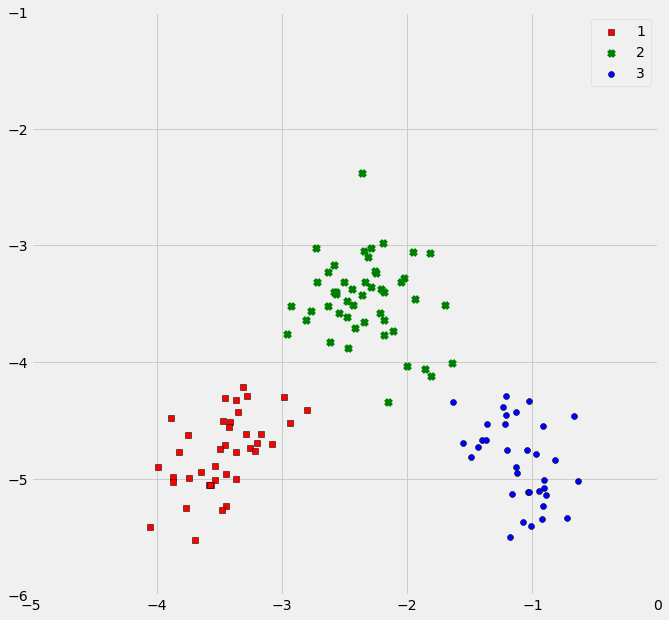

In [15]:
# 11. Plot the standartized data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-5,0)
ax0.set_ylim(-6,-1)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')

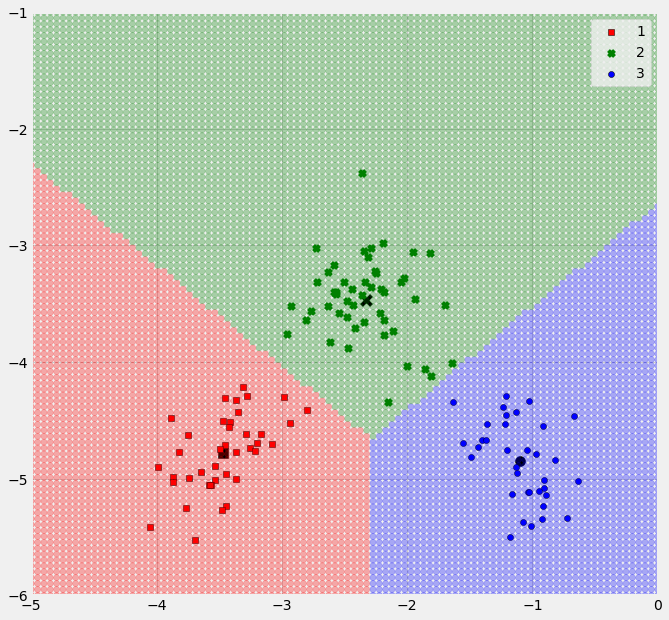

In [16]:
# Plot the standartized data once again
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-5,0)
ax0.set_ylim(-6,-1)

# 12. # Plot the Voroni spaces
means = []

for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
    
mesh_x, mesh_y = np.meshgrid(np.linspace(-5,0,100),np.linspace(-6,-1,100)) 

mesh = []
for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))

# Use KNeighborsClassifier function from sklearn
NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))



for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')

ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)

plt.show()        

<h1 align="center">End of Seminar</h1>